In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from utils import *


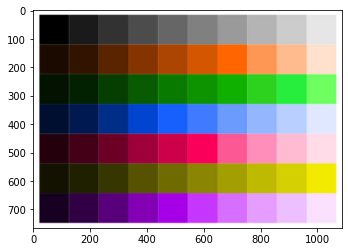

In [3]:
img = mpimg.imread('img_2.jpg')

height, width  = img.shape[0], img.shape[1]
plt.imshow(img)
plt.show()

In [4]:
print(type(img))    # Print the img variable data type
print(np.shape(img))  # Print the img variable dimension

<class 'numpy.ndarray'>
(765, 1086, 3)


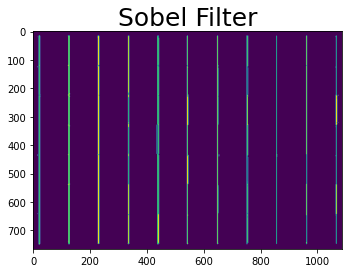

In [5]:
plt.title('Sobel Filter', fontsize=25)
image = img.copy()
combined = np.zeros((height,width), dtype = np.uint8)
combined_condition = sobel_filter(image)
combined[combined_condition] = 1
plt.imshow(combined)
plt.show()

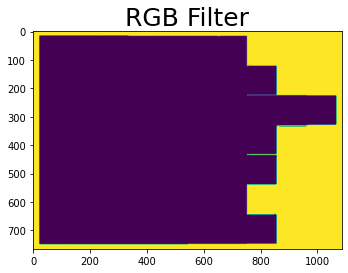

In [6]:
#RGB Filter
plt.title('RGB Filter', fontsize=25)
rgb = np.copy(img)
color_combined = np.zeros((height,width), dtype = np.uint8)
r_g_condition = rgb_filter(rgb)
color_combined[r_g_condition] = 1
plt.imshow(color_combined)
plt.show()


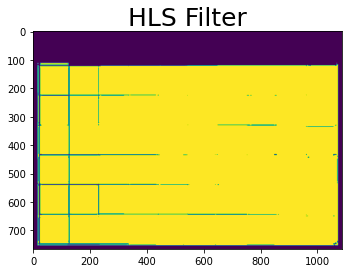

In [7]:
#HLS filter
plt.title('HLS Filter', fontsize=25)

img = np.copy(img)
s_binary = np.zeros((height,width), dtype = np.uint8)
s_binary_condition = hls_filter(img)
s_binary[s_binary_condition] = 1
plt.imshow(s_binary)
plt.show()

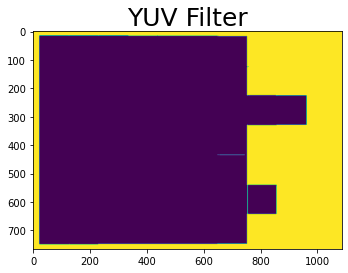

In [8]:
#YUV filter
plt.title('YUV Filter', fontsize=25)

img = np.copy(img)
yuv = np.zeros((height,width), dtype = np.uint8)
yuv_condition = yuv_filter(img)
yuv[yuv_condition] = 1
plt.imshow(yuv)
plt.show()

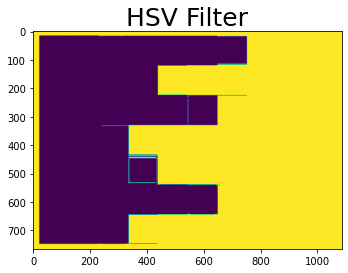

In [9]:
#HSV filter
plt.title('HSV Filter', fontsize=25)

img = np.copy(img)
hsv = np.zeros((height,width), dtype = np.uint8)
hsv_condition = hsv_filter(img)
hsv[hsv_condition] = 1
plt.imshow(hsv)
plt.show()



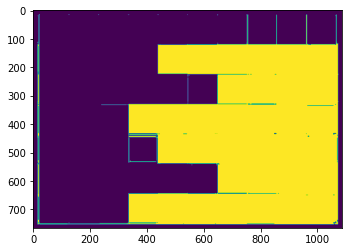

In [10]:
# Combine the two binary thresholds
combined_binary = np.zeros((height,width), dtype = np.uint8)
combined_binary[(r_g_condition | yuv_condition | hsv_condition) & (s_binary_condition | combined_condition )] = 1
plt.imshow(combined_binary)
plt.show()

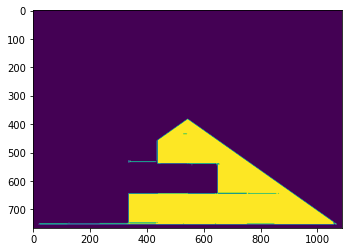

In [11]:
#Region of intersect and Combined filters
from utils import filter_image
filtered_image = filter_image(img.copy())
plt.imshow(filtered_image)
plt.show()

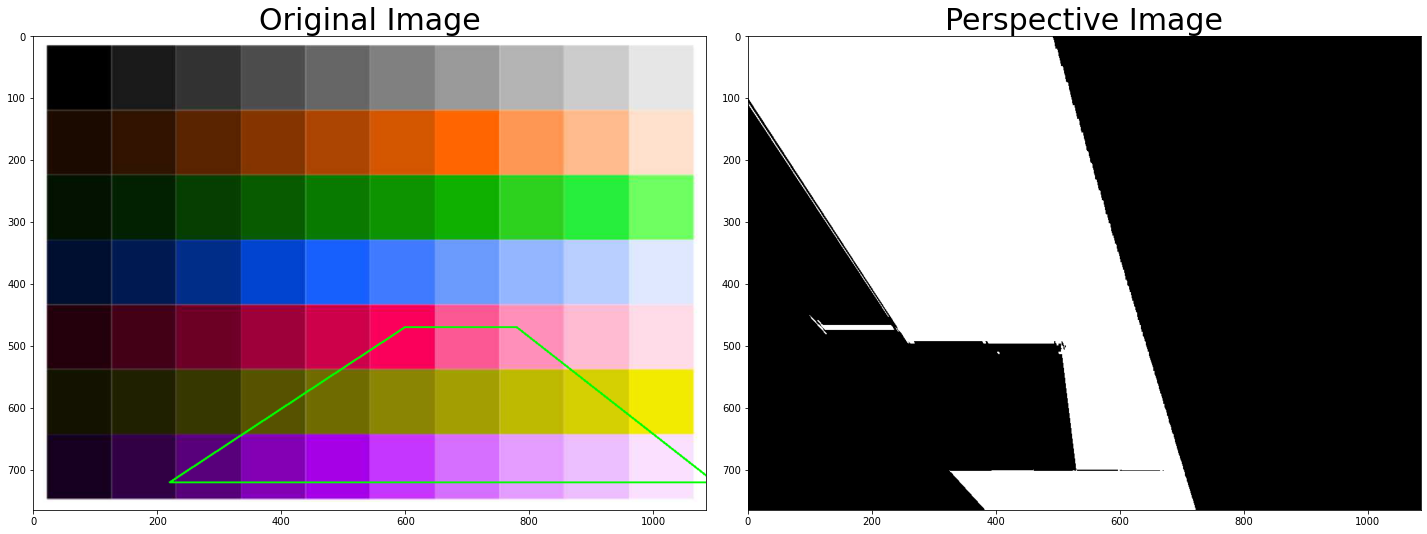

In [12]:
# # Vertices extracted manually for performing a perspective transform
#Perspective
warped, filled = perspective_transform_with_filled_area(img.copy(), filtered_image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.tight_layout()
ax1.imshow(filled)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(warped, cmap='gray')
ax2.set_title('Perspective Image', fontsize=30)
plt.show()

382


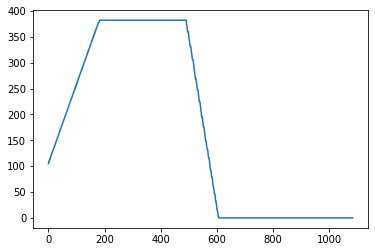

In [13]:
#Image Histogram Preview
print(warped.shape[0]//2)
histogram = np.sum(warped[:warped.shape[0]//2,:], axis=0)
plt.plot(histogram)
plt.show()



In [2]:
from PIL import Image

im = Image.open('img_1.jpg')

if not os.path.exists('files'): 
    os.makedirs('files') 

mfile = open("files/pixel_value.csv", 'w')
mfile.write("R G B A \n")
pix_val = list(im.getdata())
pix_val_str =str(pix_val)
mfile.write(pix_val_str + "\n")
mfile.close()

mfile = open("files/element_of_pix_val.csv", 'w')
pix_val_flat = [x for sets in pix_val for x in sets]
pix_val_flat_str =str(pix_val_flat)
mfile.write(pix_val_flat_str + "\n")
mfile.close()